In [1]:
import numpy as np
import torch
import cv2


In [ ]:
# 3 representations, 
# 1) opencv, computer vision toolkit used to read images. Why? Because there are utilities that only 
# exist here that dont exist in numpy or pytorch/tensorflow/keras
# 2) numpy, vectorized matrix operations. Fast. Pytorch/tensorflow/opencv use numpy as their base library and
# add functionality 
# 3) pytorch/keras/tensorflow, deep learning frameworks. There are more, used for backpropagation and training models
#


img = cv2.read()



<h4>Numpy Vectorization</h4>



In [ ]:
<h4>Convolution and FT</h4>
<li>basic operation in signal processing and computer vision is convolution</li>
<li>a separate definition for continuous signal like a cell phone signal or return signal from an incoming radar trained
on an incoming nuclear warhead vs. discrete like the output of an iphone camera. </li>

<img src="mnist_review/images/contin_conv.png">
<li>there is an equivalence between a convolution in time and a Fourier transform in the frequency domain</li>
<img src="mnist_review/images/FFT.png">
<li>Sometime faster to convert to Freq. domain to compute convolution. The convolution becomes a multiply in the frequency domain</li>

<h4>Discrete Data</h4>
<li>FT becomes FFT. There is specialized hw that does this, usually a 10x improvement in hw vs. the fastest CPU.</li>
<li>Discrete Convolution performed with matrix multiplys</li>
<li>http://www.songho.ca/dsp/convolution/convolution2d_example.html</li>
<img src="mnist_review/images/conv1.png">
<img src="mnist_review/images/conv2.png">
<img src="mnist_review/images/conv3.png">
<img src="mnist_review/images/conv4.png">
<img src="mnist_review/images/conv5.png">
<img src="mnist_review/images/conv6.png">
<img src="mnist_review/images/conv7.png">
<img src="mnist_review/images/conv8.png">
<img src="mnist_review/images/conv9.png">
<img src="mnist_review/images/conv10.png">
<img src="mnist_review/images/conv11.png">
<img src="mnist_review/images/conv12.png">
<img src="mnist_review/images/conv13.png">
<img src="mnist_review/images/conv14.png">
<img src="mnist_review/images/conv15.png">
<img src="mnist_review/images/conv16.png">
<img src="mnist_review/images/conv17.png">
<img src="mnist_review/images/conv18.png">
<img src="mnist_review/images/conv19.png">




<h4>Convolutions</h4>
These are 3x3 convolutions with 28x28 pixel sized MNIST images. For larger kernel sizes, >>3xe3 and for images
larger than 28x28 then FFT may be necessary. Theano. 



In [33]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

in1=np.array([1,2,3,4,5,6,7,8,9])
in1 = in1.astype(np.float32)
in1_reshape = in1.reshape(1,1,3,3)
print(in1_reshape)

kernel = np.array([-1,2,-1,0,0,0,1,2,1])
kernel = kernel.astype(np.float32)
kernel_reshape = kernel.reshape(1,1,3,3)
print(kernel_reshape)


in1 = in1_reshape
kernel = kernel_reshape
print(in1.shape,kernel.shape)
in1_tensor = Variable(torch.from_numpy(in1))
kernel_tensor = Variable(torch.from_numpy(kernel))
output = F.conv2d(in1_tensor,kernel_tensor)
print(output)


[[[[1. 2. 3.]
   [4. 5. 6.]
   [7. 8. 9.]]]]
[[[[-1.  2. -1.]
   [ 0.  0.  0.]
   [ 1.  2.  1.]]]]
[-1.  0.  0.  0.  0.  0.  1.  4.  8. 22.  7. 20. 24. 28. 32. 26.  9.]
(1, 1, 3, 3) (1, 1, 3, 3)
tensor([[[[32.]]]])


In [15]:
import torch.nn.functional as F

M = Variable(torch.ones(1, 1, 3, 3))
output = F.conv2d(M,M)
print(M.size())
print(output)

torch.Size([1, 1, 3, 3])
tensor([[[[9.]]]])


<h4>Edge Detection Convolution</h4>
http://www.aishack.in/tutorials/sobel-laplacian-edge-detectors/
Convolution is used for edge detectors as an approximation to a derivative. Sobel uses 2 kernels in the verticzal and horizongal direction to detect
edges. 
<img src="mnist_review/images/sobel_a.png">
The image above represents an intensity gray scale image. The place where you transition from black to white 
represents an edge. Calculating the derivative and detecting a peak at some preset theshold value is a sobel edge detector. 


<img src="mnist_review/images/sobel_b.png">
<img src="mnist_review/images/sobel_d.png">
<img src="mnist_review/images/sobel_e.png">
If setting a threshold is problematic another approach is to use a zero crossing to represent an edge. This is a Laplace
filter. 
<img src="mnist_review/images/sobel_c.png">

<img src="mnist_review/images/sobel_f.png">
<img src="mnist_review/images/sobel_g.png">

There are many tradeoffs between the 2 simplistic scenes above. Noise affets Laplacian edge detectors; apply gaussian 
blur to reduce white noise effects. Sobel

<img src="mnist_review/images/sobel_h.png">
requires analysis at edge detetion level with test images for noise suppression and threshold and parameter settings.
Usually requires some sort of calibration and image processing. Art. 


/Users/dougchang/TDS
<class 'str'>
<class 'numpy.ndarray'> (1200, 1600)


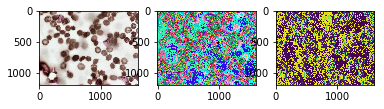

In [54]:
import numpy as np
import cv2
import torch
import os
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from skimage.color import rgb2gray
%matplotlib inline
#
# Mailing list for skimage, ask for help!!!!
#
print(os.getcwd())
p = os.path.join(os.getcwd(),"malaria","malaria","images","8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png")
print(type(p))

img = cv2.imread(p,cv2.IMREAD_COLOR)
#image_gray = rgb2gray(image) #returns 5x5 image
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(type(image_gray),image_gray.shape)

fig = plt.figure()
ax1 = fig.add_subplot(131) #riggt
ax2 = fig.add_subplot(132) #left 
ax3 = fig.add_subplot(133)
sobel=ndimage.sobel(img)
sobel_g = ndimage.sobel(image_gray)
ax1.imshow(img)
ax2.imshow(sobel)
ax3.imshow(sobel_g)
plt.show()

#what did I forget to do? 
#circles/blobs have different algorithms
#etc...

In [ ]:
<h6>Blob Detection</h6>
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html
    
    

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray


